# Machine Learning Assignment: Predicting Extreme Events in Apple Stock Prices
## Objective
The goal of this assignment is to predict **extreme events** in Apple stock prices using machine learning techniques. An **extreme event** is defined as a **daily price movement exceeding 2%** in either direction (positive or negative) compared to the previous day.

You are required to:
1. Build a **Random Forest** classifier and a **Temporal Convolutional Neural Network (TCNN)** to predict extreme events using the previous 10 days of stock data.
2. Evaluate the models on test data and analyze their performance.
3. Suggest and implement improvements on the TCNN to enhance the models' performance.

---

### Assignment Tasks
1. **Data Preprocessing**: Load, preprocess, and engineer features from historical stock data.
2. **Random Forest Model**: Build and train a Random Forest classifier for extreme event prediction.
3. **Temporal CNN Model**: Build and train a Temporal CNN model for extreme event prediction.
4. **Model Evaluation**: Compare the performance of the models.
5. **Improvement Task**: Suggest and implement approaches to improve the performance of the TCNN model.

---

## Task 1: Data Preprocessing

### Step 1.1: Load the Data
Download **Apple stock data** (from January 2015 to January 2024) from [Yahoo Finance](https://finance.yahoo.com/) or use a similar source. The dataset should include the following columns:
- `Open`
- `High`
- `Low`
- `Close`
- `Volume`
- `Adj Close` (Adjusted Close)

Load the dataset into a pandas DataFrame and inspect the first few rows to verify the data.

### Step 1.2: Calculate Daily Returns
Calculate the daily percentage return for Apple stock based on the adjusted closing price. This can be computed using:
- `Daily_Return = (Adj Close_t - Adj Close_t-1) / Adj Close_t-1 * 100`

Ensure that missing values in the dataset (due to holidays or weekends) are handled appropriately.

### Step 1.3: Define Extreme Events
Define an **extreme event** as any day where the percentage change in the adjusted close price exceeds **±2%**. Create a binary column `Extreme_Event` with the following logic:
- `1` if the daily return is greater than 2% or less than -2% (extreme event).
- `0` if the daily return is between -2% and 2% (no event).

Next, shift the target variable `Extreme_Event` by one day so that the model is trained to predict if an extreme event occurs **tomorrow** based on today's data.

### Step 1.4: Split Data into Features and Target
Extract the following columns as features for the model:
- `Open`
- `High`
- `Low`
- `Close`
- `Volume`
- `Daily_Return`

The target variable will be the `Extreme_Event` column created earlier.

Split the data into **70% training**, **15% validation**, and **15% test** sets. Make sure to split the data in sequence to preserve the time-series nature of the stock data and avoid data leackage.

---

## Task 2: Random Forest Model

### Step 2.1: Model Training
You are required to build a **Random Forest Classifier** to predict extreme events using 10 days of historical stock data. You can use **scikit-learn** for this task.

- Train the Random Forest classifier using the training data (features from the past 10 days).
- Evaluate the model on the validation set to tune hyperparameters if necessary.

### Step 2.2: Model Evaluation
Evaluate the performance of the **Random Forest** model on the **test set**. Report the following metrics:
- **Confusion Matrix**
- **Accuracy**
- **Precision, Recall, F1-Score**

Explain whether the model is performing well in predicting extreme events and if there are any signs of overfitting or underfitting.

---

## Task 3: Temporal CNN Model

### Step 3.1: Input Preparation
For the **Temporal Convolutional Neural Network (TCNN)**, the input will consist of **sequences of 10 days** of stock data (features). The model will predict whether an extreme event will occur on the **next day** based on these sequences.

Prepare the data as follows:
- Convert the input data into sequences of 10 days, where each sequence is used to predict the target label for the next day.
- Ensure the input shape is suitable for a CNN: `[batch_size, num_features, sequence_length]`.

### Step 3.2: Model Architecture
Build a **Temporal CNN** model using PyTorch, with the following specifications:
- Two **1D Convolutional layers** to extract temporal features across the 10-day window.
- **ReLU** activations after each convolution layer.
- A fully connected **Dense layer** after flattening the features from the CNN layers.
- Use **Softmax** for the output layer to predict the probability of the two classes (extreme event vs no event).

### Step 3.3: Model Training
Train the **Temporal CNN** using the **Adam optimizer** and **Cross-Entropy Loss**. Monitor the performance on the validation set at the end of each epoch.

Ensure the training process handles potential issues like overfitting by using techniques such as:
- **Early stopping**
- **Dropout** layers

### Step 3.4: Model Evaluation
After training, evaluate the performance of the **Temporal CNN** model on the **test set**. Report the same metrics as for the Random Forest model:
- **Confusion Matrix**
- **Accuracy**
- **Precision, Recall, F1-Score**

---

## Task 4: Model Comparison

### Step 4.1: Compare the Models
Compare the performance of the **Random Forest** and **Temporal CNN** models based on the evaluation metrics. Address the following questions:
- Which model performs better for predicting extreme events?
- Which metric or metrics are more relevant for evaluating the performance of the methods?
- Why is forecasting of such events a challenging task? Name three reasons.
- How well do the models handle class imbalance (extreme events vs no extreme events)?
- Can you assess the predictability of the models based on their performance? Given the potentially low performance, would you say the models demonstrate predictive ability for extreme events in stock prices? Please explain your reasoning.

---

## Task 5: Improvement Task

### Step 5.1: Performance Improvement
The performance of the models is relatively low.
Propose and implement improvements to enhance the performance of the **Temporal CNN** model.

---

## Submission Instructions

Your submission should be organized in a folder containing all necessary files to ensure **reproducibility** and clear documentation of your work. The folder should be structured as follows:

### **Folder Structure**:

```
submission/
│
├── src/                 # Directory containing all Python executable scripts
│   ├── data_processing.py
│   ├── random_forest.py
│   ├── temporal_cnn.py
│   ├── model_evaluation.py
│   └── improvement.py
│
├── README.md            # Detailed instructions on how to run the code
│
├── pyproject.toml       # Poetry configuration file for dependency management
├── poetry.lock          # Poetry lock file for reproducibility
│
├── report.pdf           # A detailed report including model performance and analysis
│
└── data/                # Directory for any required dataset or files
```




## **Submission Components**:

1. **Python Executables** (`src/`):
   - The `src/` folder should contain **Python scripts** for each major task:
     - `data_processing.py`: Script to load, preprocess, and engineer features from the stock data.
     - `random_forest.py`: Script to build and train the Random Forest model.
     - `temporal_cnn.py`: Script to build and train the Temporal CNN model.
     - `model_evaluation.py`: Script to evaluate the models and generate performance metrics.
     - `improvement.py`: Script for any additional improvements made to enhance model performance.
   Each script should be modular and runnable as standalone or as part of an automated pipeline.

2. **README.md**:
   - Include a **comprehensive README** file that provides step-by-step instructions on how to set up the environment and run the code.
   - Clearly explain how to run each script in the `src/` folder, how to reproduce the results, and what dependencies are required.
   - The README should also specify any additional configuration or dataset download steps.

3. **Dependency Management**:
   - Use **Poetry** (or a similar dependency management tool) to handle all necessary dependencies.
     - Include the `pyproject.toml` file that defines the environment.
     - Include the `poetry.lock` file to ensure full reproducibility of the environment.
   - Ensure that all external libraries, dependencies, and versions are captured in these files to allow for seamless recreation of the development environment.

4. **Report (report.pdf)**:
   - Submit a **detailed report** in PDF format that includes:
     - Performance metrics (confusion matrix, precision, recall, F1-score) for both the Random Forest and Temporal CNN models.
     - A discussion of the results, model predictability, and potential areas for improvement.
     - An explanation of the improvement implemented in `improvement.py` and its impact on model performance.

5. **Reproducibility**:
   - The submission must be fully **reproducible**. Anyone with access to the submission should be able to:
     1. Set up the environment using the provided `pyproject.toml` and `poetry.lock`.
     2. Run the provided Python scripts and obtain the same results as presented in your report.

## **Important Notes**:
- Don't expect to completely solve the assignment and achieve very high performance scores, as forecasting stock price movements is a very challenging and difficult task. 
- The **accuracy of the results** is important, but equal emphasis will be placed on the clarity of your code, your ability to handle dependencies, and your documentation.
- **Reproducibility** is critical, so please ensure that all dependencies and code required to generate your results are included in the submission.
- While achieving good results is important, the emphasis of this assignment is on **critical and creative thinking**. A clear, thoughtful analysis with creative ideas will be valued over simply producing a high-accuracy model. In this respect, **Task 5** is the most important one.



In [4]:
#MODULES
import pandas as pd
from datetime import datetime,timedelta
import holidays
# Detect US holidays
#hldys = holidays.country_holidays('US')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
pd.set_option('display.max_columns', None)


In [5]:
input_data = pd.read_csv("./data/AppleStockPrice.csv")#csv taken from -> https://www.kaggle.com/datasets/muhammadbilalhaneef/-apple-stock-prices-from-1981-to-2023
input_data['Date'] = pd.to_datetime(input_data['Date'],format='%d-%m-%Y')
input_data.set_index('Date',inplace=True)
input_data.sort_index(inplace=True)
print("\n NA's\n",input_data.isna().sum())#checking for NA's
print("\n Dtypes--->\n",input_data.dtypes)#seems ok
print("\n duplicates:\n",sum(input_data.duplicated()))


 NA's
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

 Dtypes--->
 Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

 duplicates:
 0


This dataset provides daily stock prices and volume of Apple. 
Here are columns description:
| Column    | Description                                                      |
|-----------|------------------------------------------------------------------|
| Date      | Date of trading day                                              |
| Open      | Stock price at market open                                       |
| High      | Highest stock price during the trading day                       |
| Low       | Lowest stock price during the trading day                        |
| Close     | Stock price at market close                                      |
| Adj Close | Adjusted closing price accounting for dividends and stock splits |
| Volume    | Number of shares traded.                                         |

In [6]:
#cutting on dates: 20215-2024
input_data = input_data[
            (input_data.index>=pd.to_datetime('2015-01-01')) 
            &
            (input_data.index<=pd.to_datetime('2024-01-01'))
           ]

In [7]:
us_public_holidays = pd.Series(holidays.country_holidays('US',  years = range(
                                                             input_data.index.min().year,
                                                             input_data.index.max().year+1
                                                            )
                                         )
               )
us_public_holidays = pd.DataFrame(us_public_holidays).reset_index().rename(columns={'index':'Date',0:'holiday_name'}).set_index('Date').sort_index()
us_public_holidays

,holiday_name
Date,
2015-01-01,New Year's Day
2015-01-19,Martin Luther King Jr. Day
2015-02-16,Washington's Birthday
2015-05-25,Memorial Day
2015-07-03,Independence Day (observed)
...,...
2023-10-09,Columbus Day
2023-11-10,Veterans Day (observed)
2023-11-11,Veterans Day


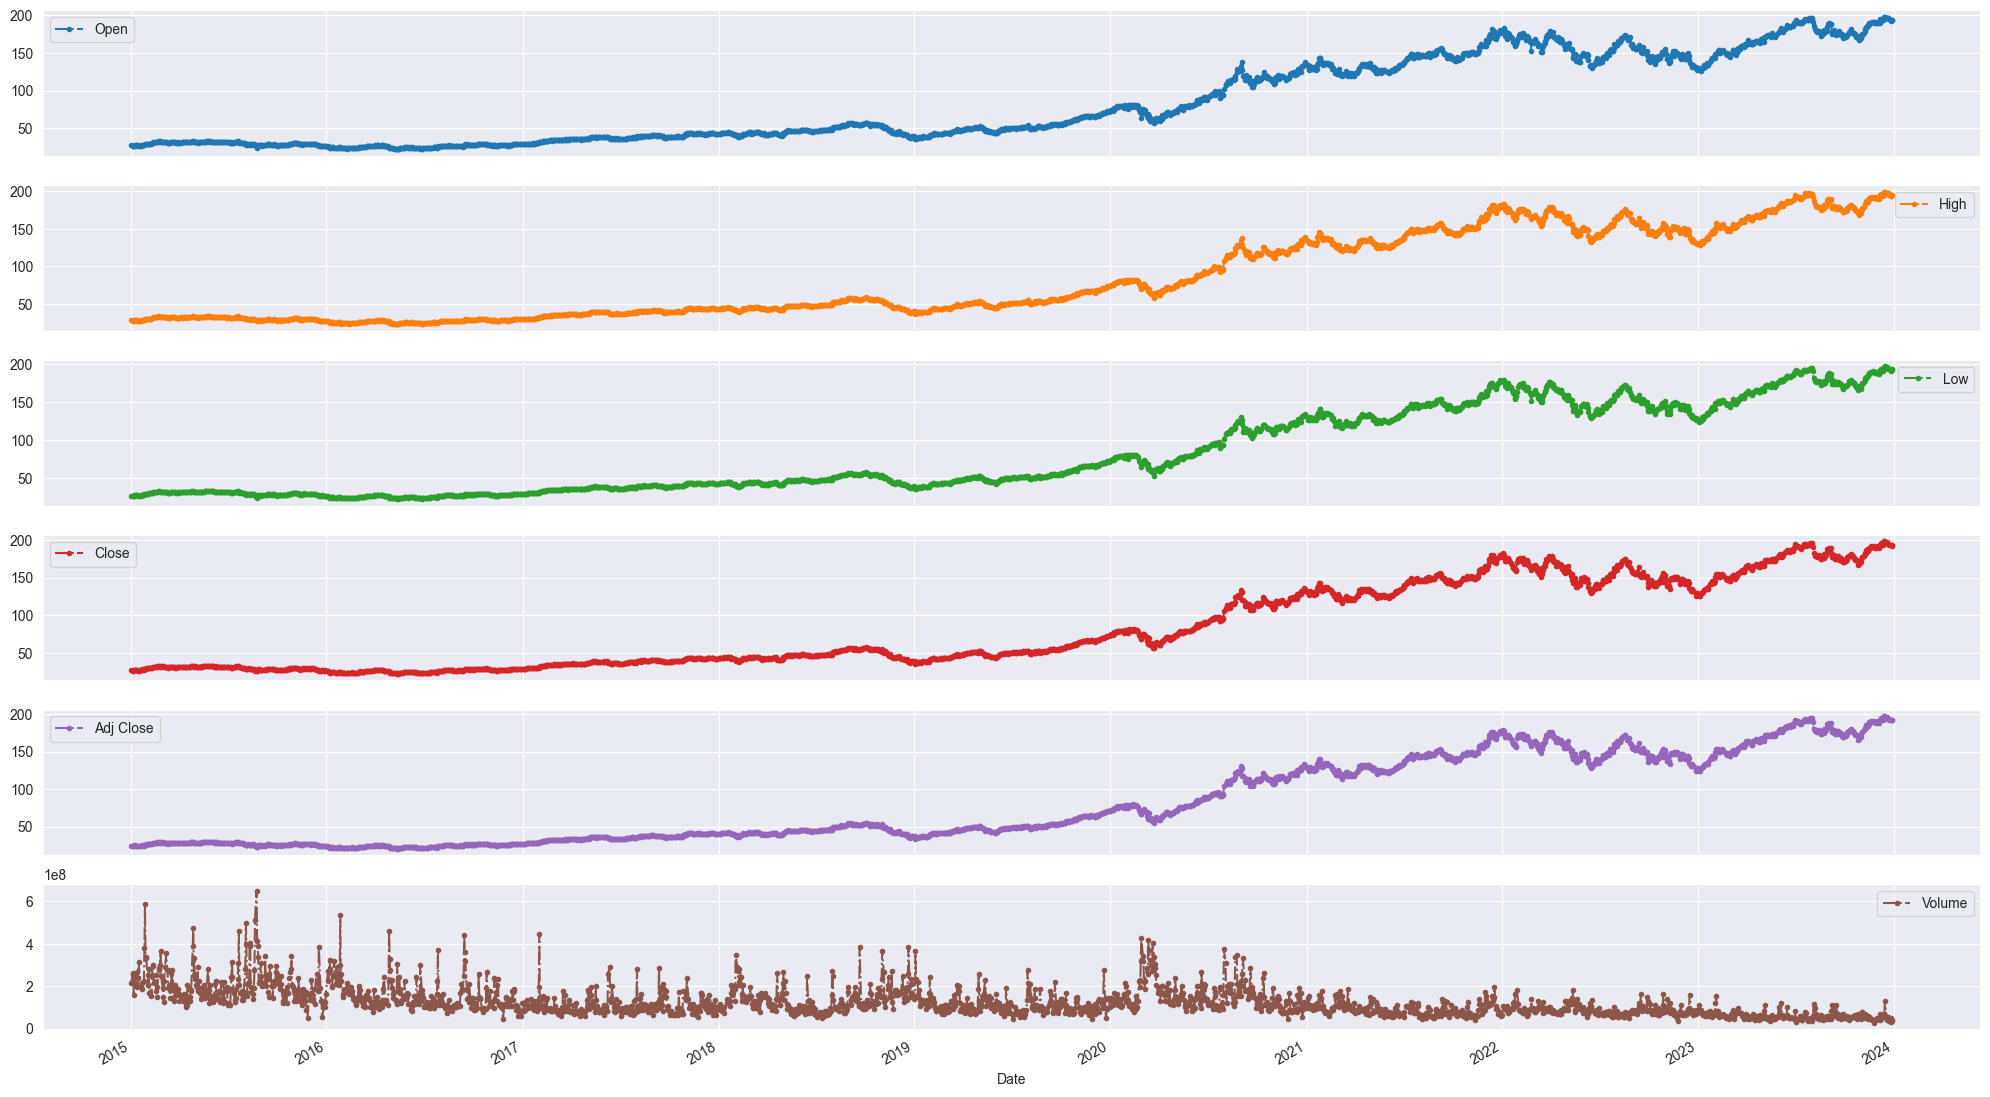

In [8]:
input_data.plot(figsize=(25,15),marker='.',linestyle='-.',subplots=True);

In [9]:
#By resampling we can locate the missing dates
#we flag them weekend OR US holiday
input_data_nan = input_data.resample('D').asfreq()
input_data_nan = input_data_nan.join(us_public_holidays)#adding holidays
input_data_nan['day_name'] = pd.to_datetime(input_data_nan.index).day_name();#adding nameday
input_data_nan['holiday_name'] = input_data_nan.apply(lambda row: 'weekend' if (row.day_name in ['Saturday','Sunday'] and pd.isnull(row.holiday_name)) else row.holiday_name, axis=1)#weekend flag only if there is no holiday_name already filled
input_data_nan = input_data_nan[input_data_nan[input_data_nan.columns[0]].isna()]#select Missing rows (by chosing the first column randomly "0")
input_data_nan

,Open,High,Low,Close,Adj Close,Volume,holiday_name,day_name
Date,,,,,,,,
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,weekend,Saturday
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,weekend,Sunday
2015-01-10,NaN,NaN,NaN,NaN,NaN,NaN,weekend,Saturday
2015-01-11,NaN,NaN,NaN,NaN,NaN,NaN,weekend,Sunday
2015-01-17,NaN,NaN,NaN,NaN,NaN,NaN,weekend,Saturday
...,...,...,...,...,...,...,...,...
2023-12-16,NaN,NaN,NaN,NaN,NaN,NaN,weekend,Saturday
2023-12-17,NaN,NaN,NaN,NaN,NaN,NaN,weekend,Sunday
2023-12-23,NaN,NaN,NaN,NaN,NaN,NaN,weekend,Saturday


In [10]:
##Dates that are not listed as public holidays OR are weekends. Hm.....
#need to eyeball with -> https://www.timeanddate.com/holidays/us/20xx
input_data_nan[input_data_nan['holiday_name'].isna()]

,Open,High,Low,Close,Adj Close,Volume,holiday_name,day_name
Date,,,,,,,,
2015-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
2016-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
2017-04-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
2018-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
2018-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday
2019-04-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
2020-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
2021-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
2022-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday


In [11]:
#distribution of US holidays along the week days
pd.DataFrame(input_data_nan.groupby(['day_name','holiday_name']).size()).rename(columns={0:'counts'}).sort_index()

counts
day_name  holiday_name                                           
Friday    Christmas Day                                         2
          Christmas Day (observed)                              1
          Independence Day (observed)                           2
          New Year's Day                                        2
Monday    Christmas Day                                         2
          Christmas Day (observed)                              2
          Independence Day                                      2
          Independence Day (observed)                           1
          Juneteenth National Independence Day                  1
          Juneteenth National Independence Day (observed)       1
          Labor Day                                             9
          Martin Luther King Jr. Day                            9
          Memorial Day                                          9
          New Year's Day                                        1
          New Year's Day (observed)                             2
          Washington's Birthday                                 9
Saturday  Christmas Day                                         1
          Independence Day                                      2
          Juneteenth National Independence Day                  1
          New Year's Day                                        1
          Veterans Day                                          2
          weekend                                             462
Sunday    Christmas Day                                         2
          Independence Day                                      1
          Juneteenth National Independence Day                  1
          New Year's Day                                        2
          Veterans Day                                          1
          weekend                                             462
Thursday  Independence Day                                      1
          Thanksgiving                                          9
Tuesday   Christmas Day                                         1
          Independence Day                                      2
          New Year's Day                                        1
Wednesday Christmas Day                                         1
          Independence Day                                      1
          New Year's Day                                        1

In [12]:
#check for missing consecutive dates 
df = input_data_nan.reset_index()[['Date']]
#df = input_data_nan['Date']
df.sort_values('Date',inplace=True)
df['time_diff'] = df['Date'].diff()
one_day = timedelta(days=1) 
df['group'] = (df['time_diff'] > one_day).cumsum()#differentiate the group that consecutive days belong to
df

,Date,time_diff,group
0,2015-01-03,NaT,0
1,2015-01-04,1 days,0
2,2015-01-10,6 days,1
3,2015-01-11,1 days,1
4,2015-01-17,6 days,2
...,...,...,...
1015,2023-12-16,6 days,485
1016,2023-12-17,1 days,485
1017,2023-12-23,6 days,486
1018,2023-12-24,1 days,486


(1.0, 1000.0)

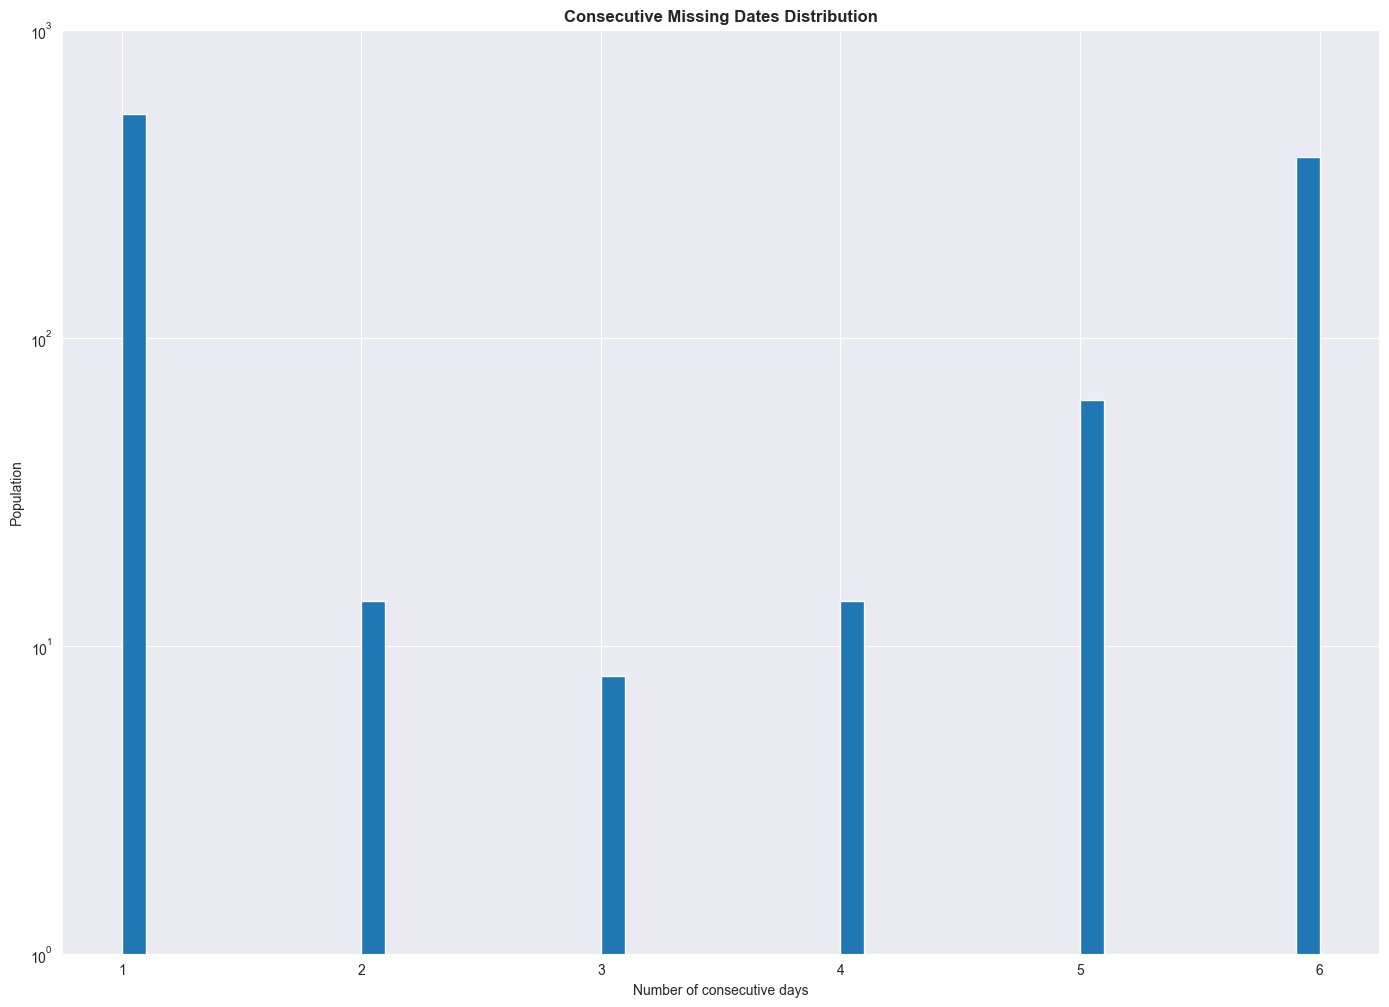

In [13]:
(df['time_diff'].dt.total_seconds()/(3600*24)).hist(bins=50,log=True,figsize=(17,12))
plt.xlabel('Number of consecutive days')
plt.ylabel('Population')
plt.title('Consecutive Missing Dates Distribution',fontweight = "bold")
plt.ylim(1e+0,1e+3)

# There exist two ways of treating _missing values_
## Create the dates and interpolate them OR 
## Ignore them and work only with trading days

In [14]:
#Calculate Daily Returns based on input_data['daily_return'] = (input_data[selected_column]- input_data[selected_column].shift(-1))/input_data[selected_column].shift(-1) <=> pd.pct(periods=-1) <- CHECKED!
input_data['daily_return'] = input_data['Adj Close'].pct_change(periods=-1)
input_data.dropna(inplace=True)
display(input_data)

,Open,High,Low,Close,Adj Close,Volume,daily_return
Date,,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.373957,212818400,0.028988
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.687302,257142000,-0.000094
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.689531,263188400,-0.013829
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.021717,160423600,-0.037000
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.944681,237458000,-0.001071
...,...,...,...,...,...,...,...
2023-12-21,196.100006,197.080002,193.500000,194.679993,193.944031,46482500,0.005578
2023-12-22,195.179993,195.410004,192.970001,193.600006,192.868134,37122800,0.002849
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.320221,28919300,-0.000518


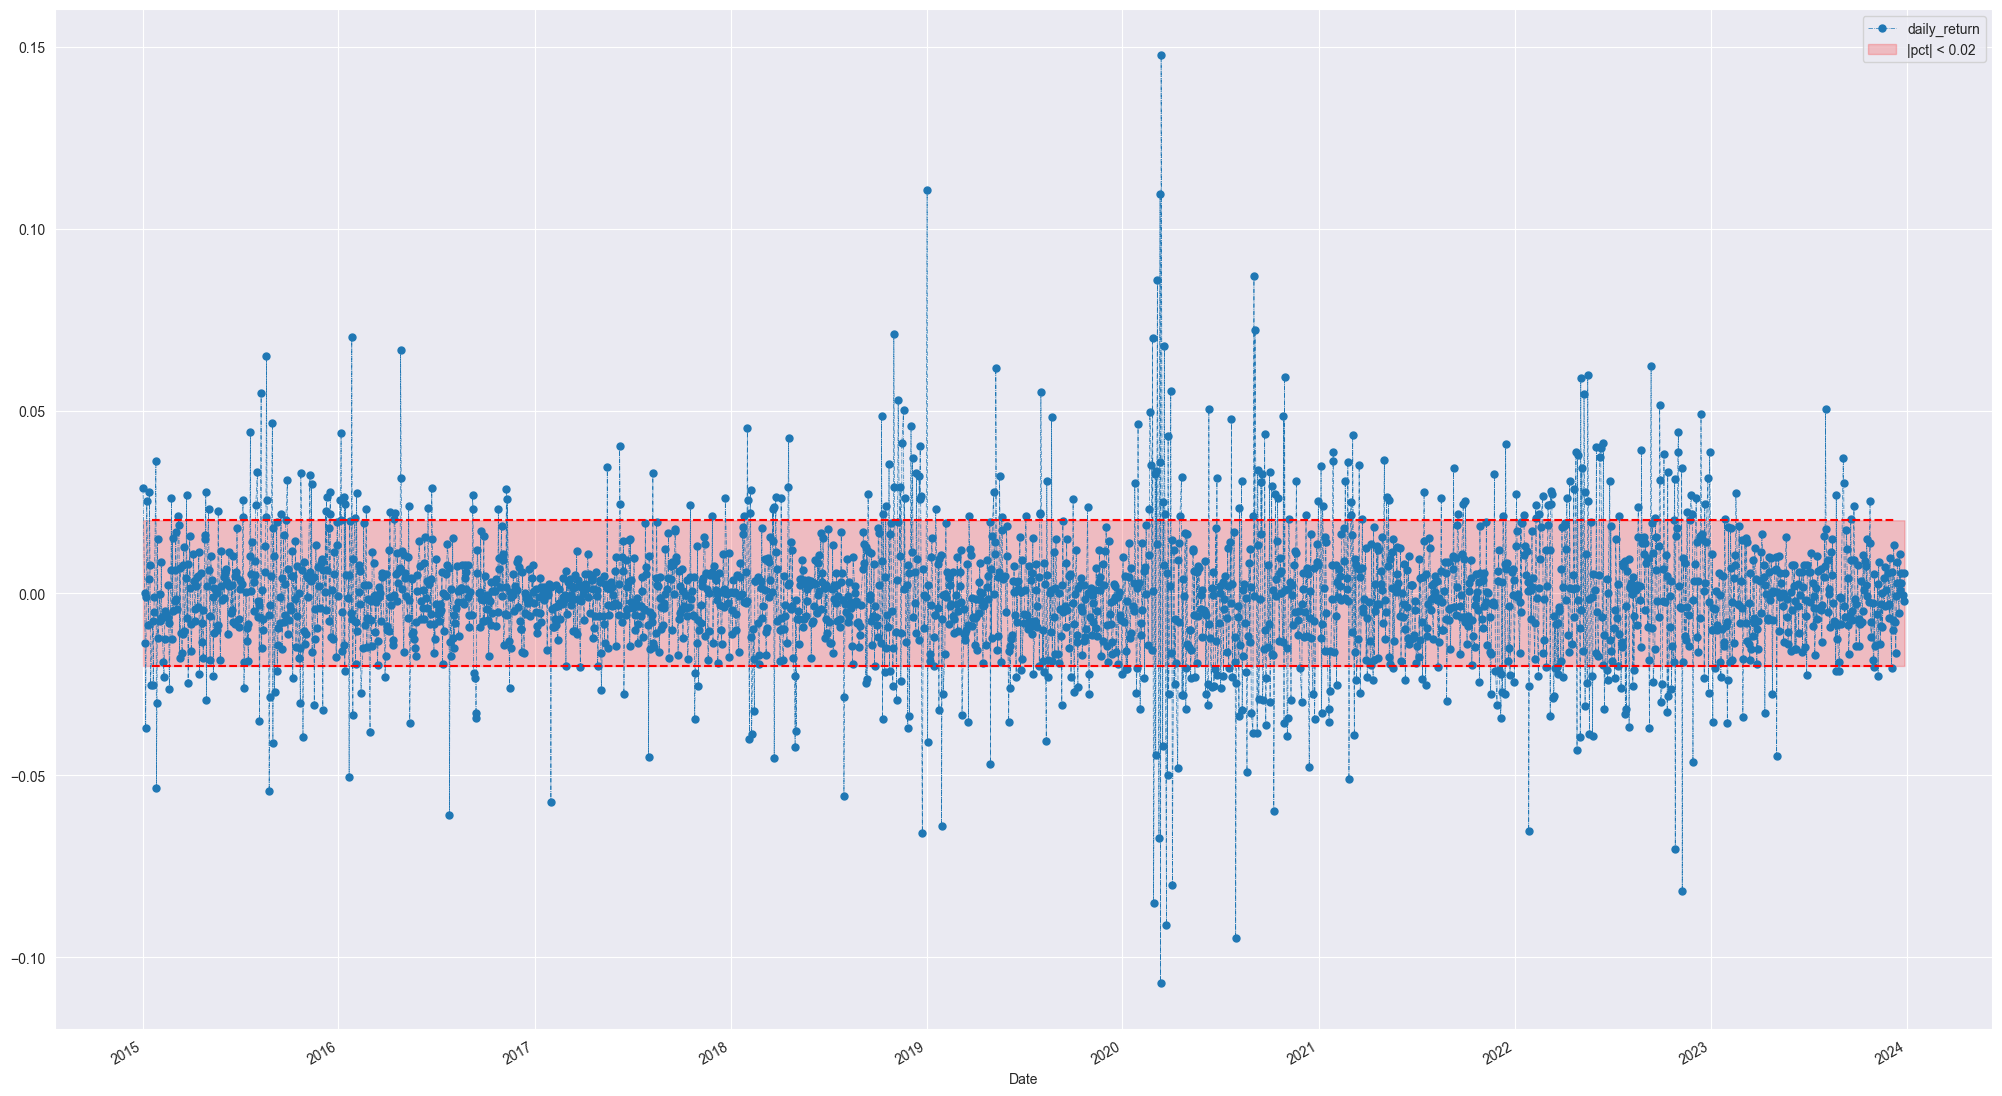

In [15]:
margin = 0.02
input_data['extreme_event'] = (input_data['daily_return']>margin).astype(int)
input_data.plot(y='daily_return',marker='.',linestyle='-.',linewidth=.5,ms=10,figsize=(25,15))
plt.axhline(xmin=0.05,xmax=.95,y=margin, color='red', linestyle='--')
plt.axhline(xmin=0.05,xmax=.95,y=-margin, color='red', linestyle='--')
plt.fill_between(x=input_data.index,y1=margin,y2=-margin,color='red',alpha=0.2,label=f'|pct| < {margin}')
plt.legend()

In [16]:
#check the distributions based on extreme event flag
input_data.groupby('extreme_event').size()

extreme_event
0    2038
1     225
dtype: int64

extreme_event
0    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
1    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
dtype: object

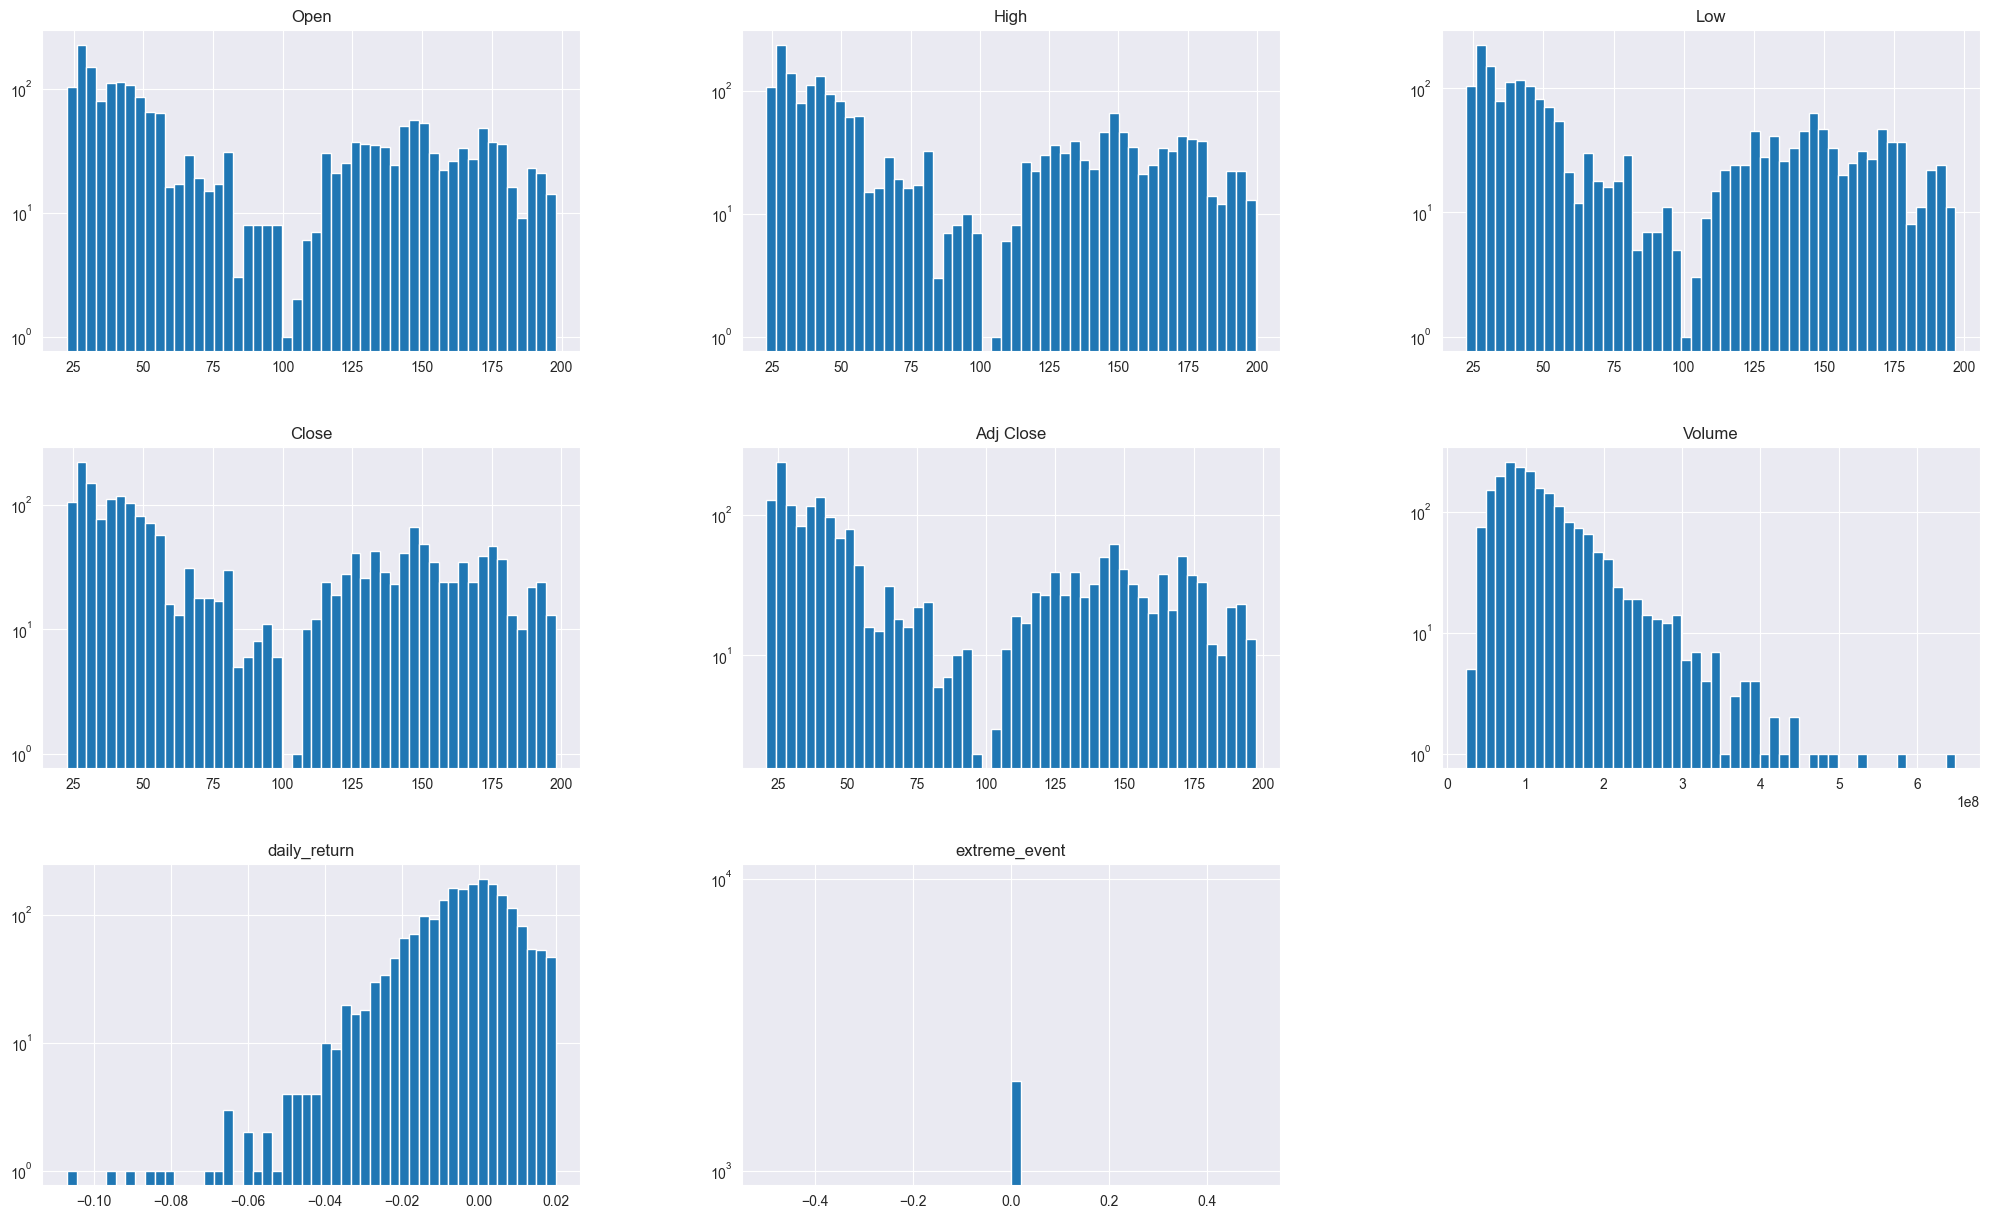

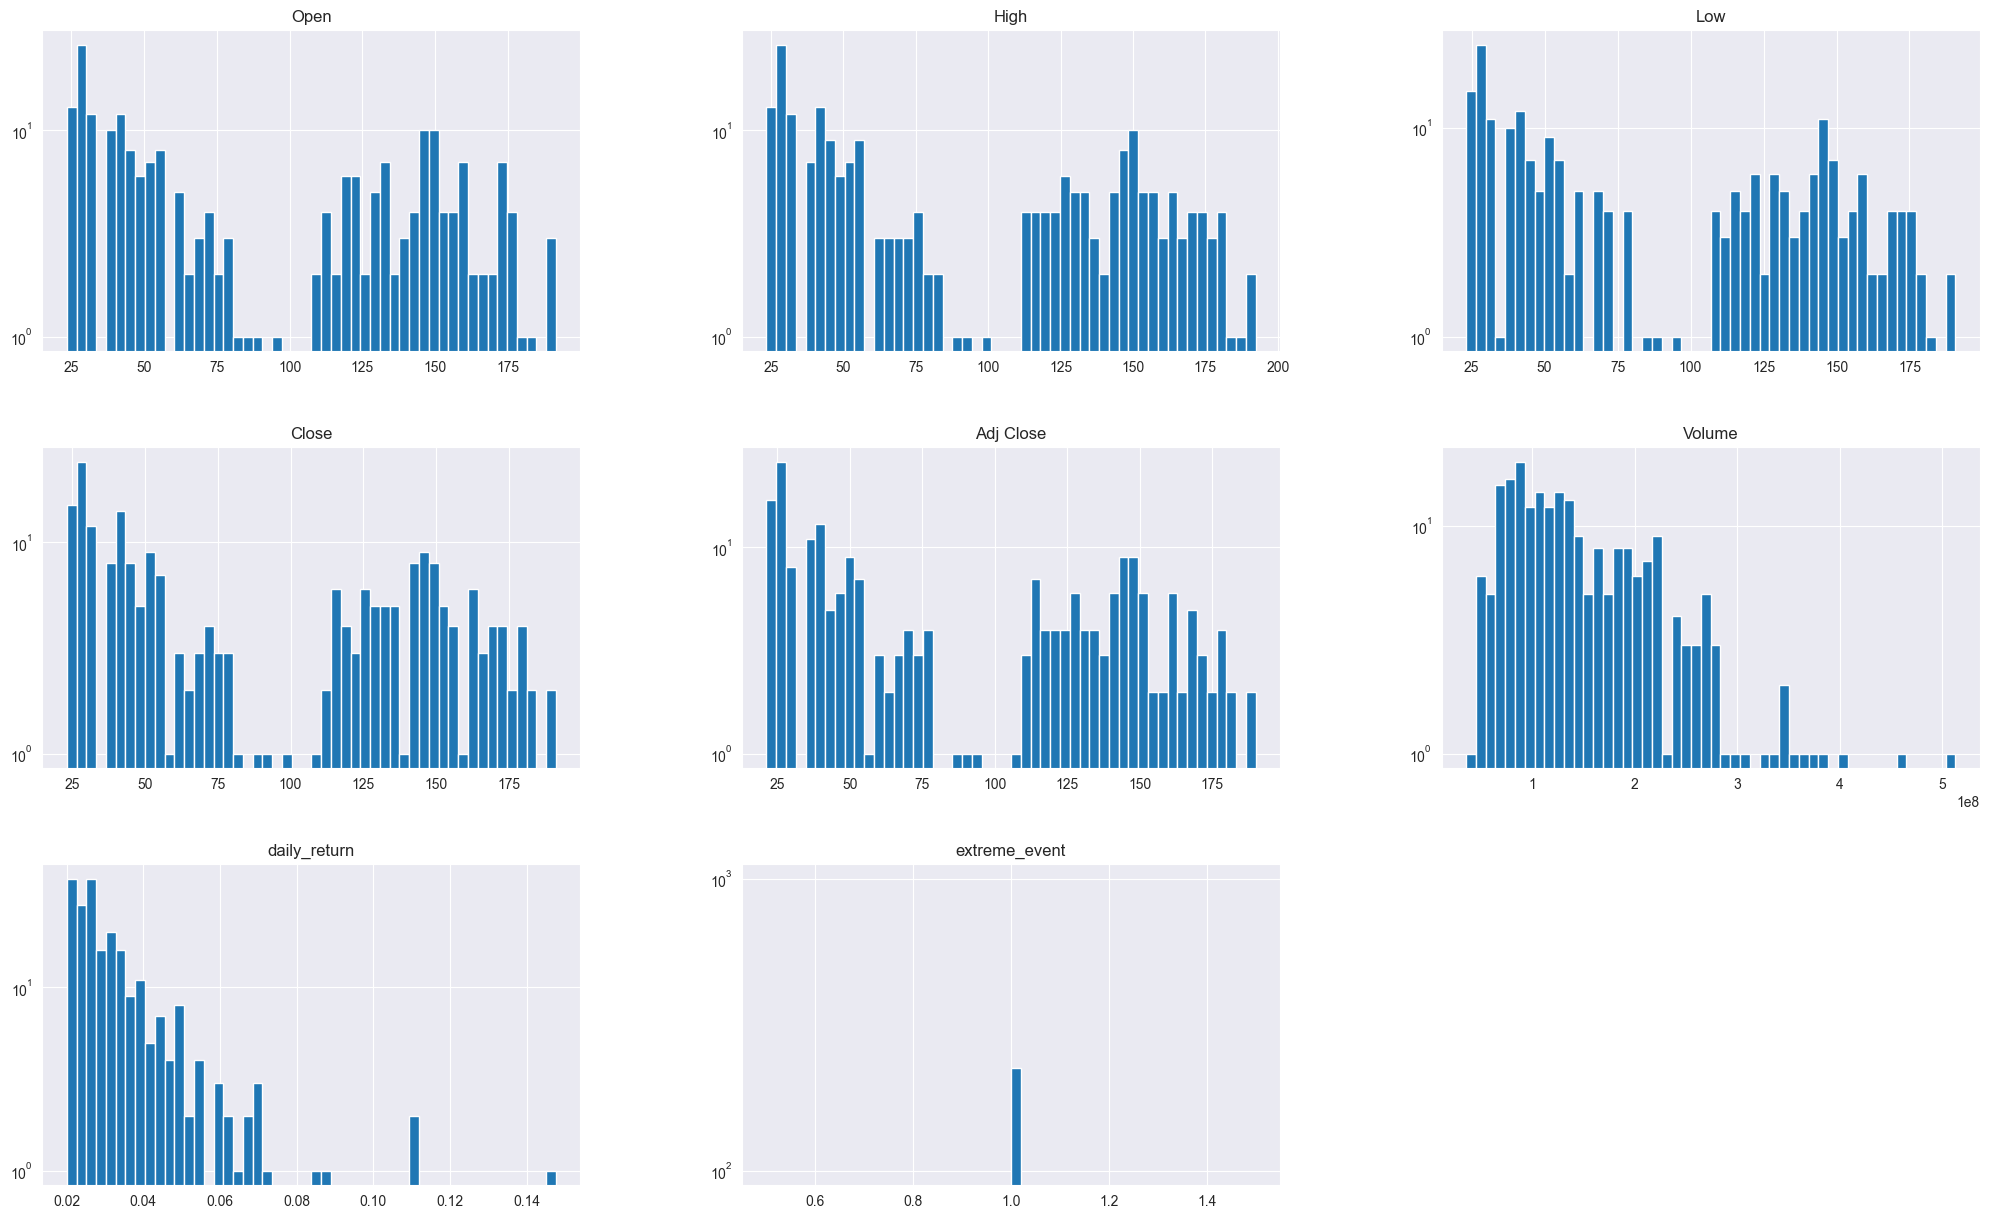

In [17]:
#All hists a
input_data.groupby('extreme_event').hist(figsize=(25,15),bins=50,log=True)

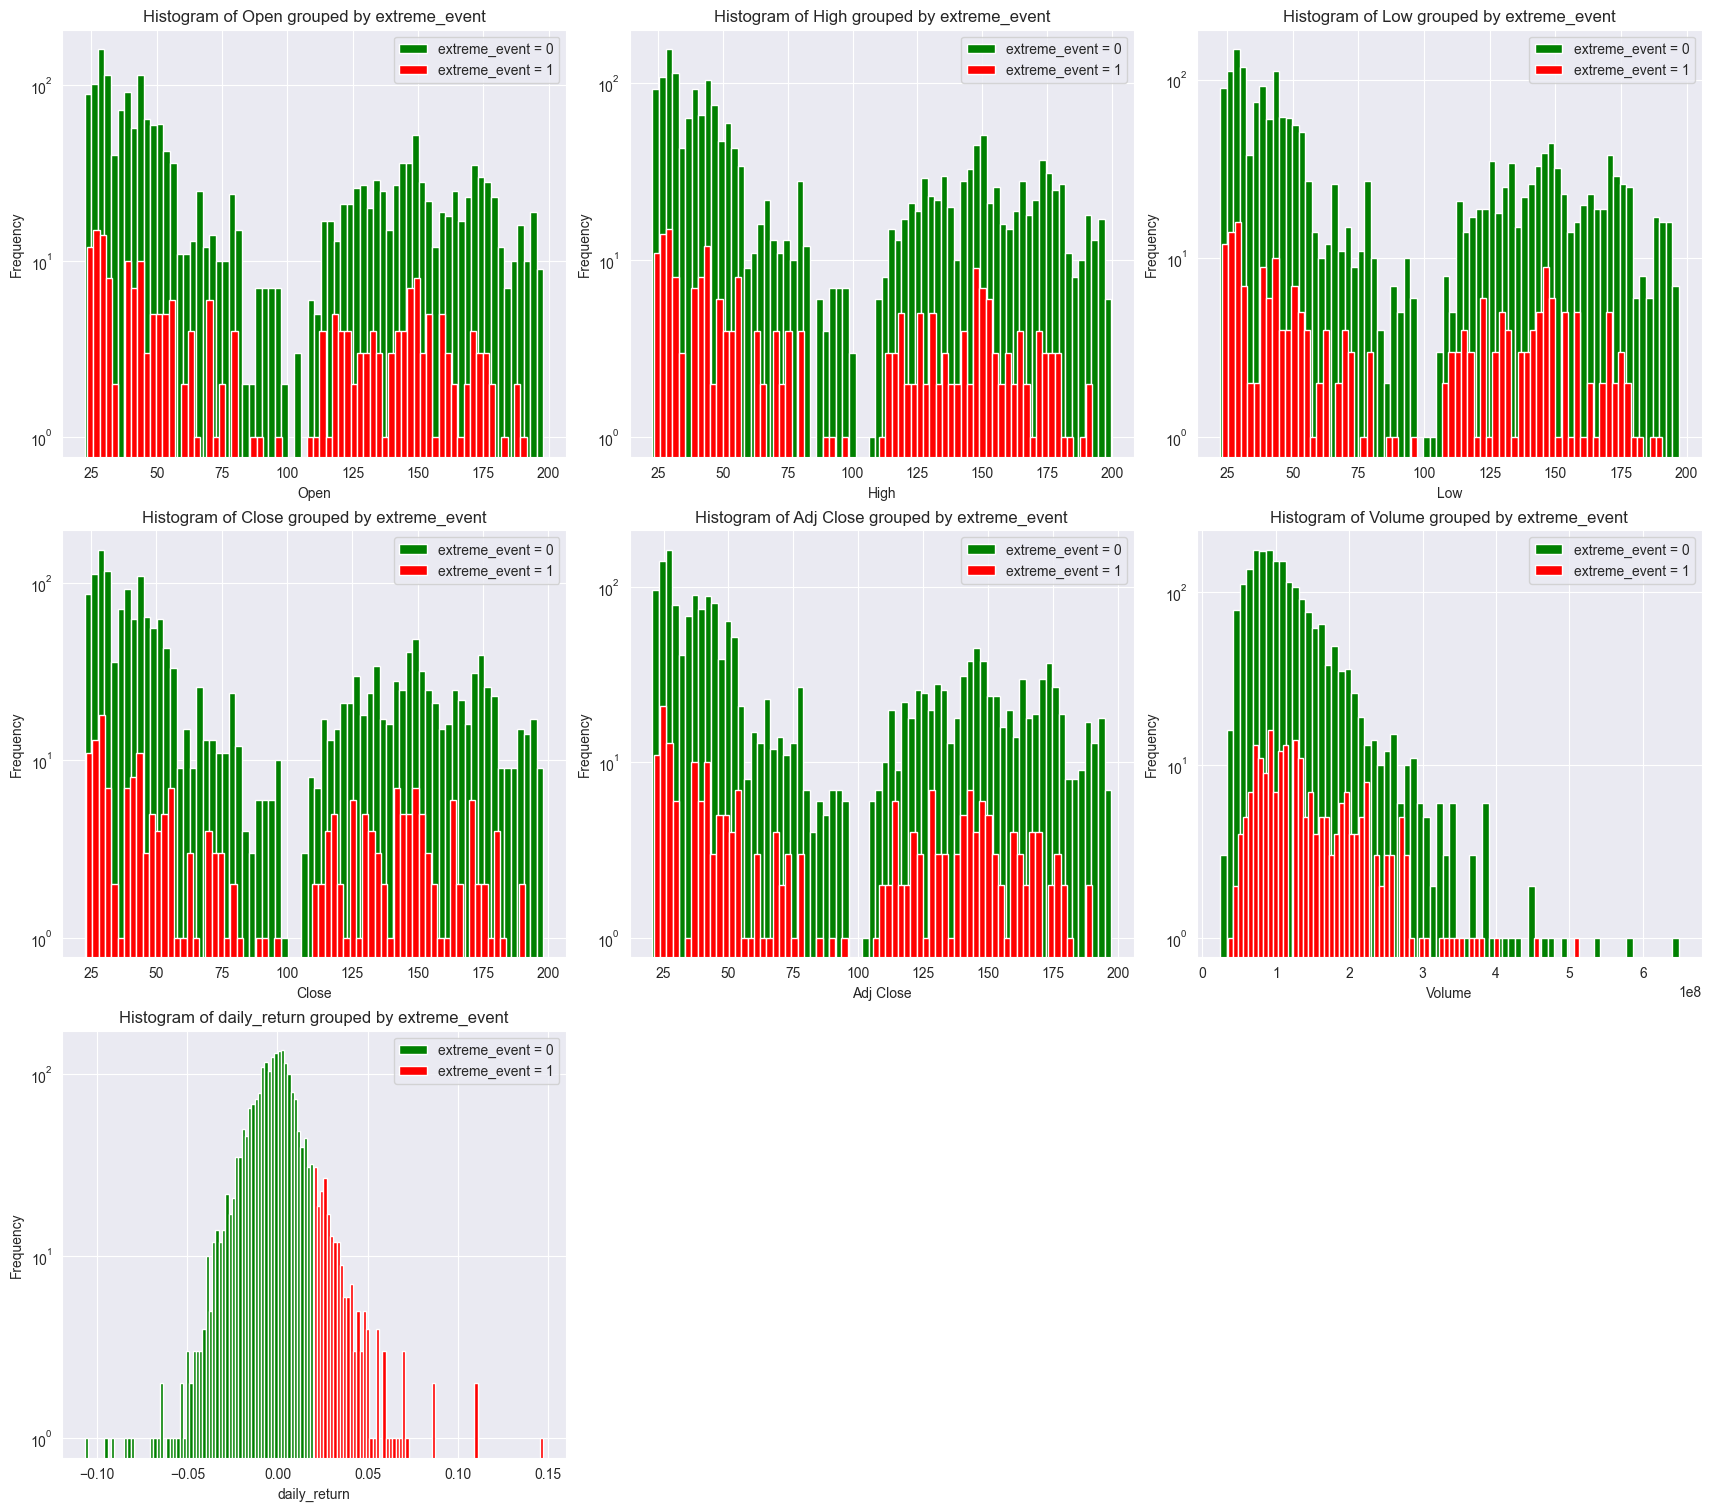

In [18]:
#same info as above but hists are superimposed
df = input_data
# Define the column to plot and the grouping column
group_column = 'extreme_event'
color_dict = {0: 'green', 1: 'red'}  # Adjust keys to match actual unique values in extreme_event

n_cols = 3  # Number of columns in the grid layout
n_rows = (len(df.columns) - 1) // n_cols + 1  # Calculate rows needed, excluding 'extreme_event'

# Set up the figure and axes for the grid layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(17, 5 * n_rows), constrained_layout=True)

# Flatten axes to make it easier to iterate, even for single rows/columns
axes = axes.flatten()

# Loop through each column except the grouping column
for i, plot_column in enumerate([col for col in df.columns if col != group_column]):
    # Loop through each group in the grouping column to plot on the same subplot
    for name, group in df.groupby(group_column):
        custom_color = color_dict.get(name, 'gray')  # Use color from dictionary, default to 'gray' if not found

        axes[i].hist(group[plot_column], bins = 70, alpha = 1, label = f'{group_column} = {name}', log = True,color = custom_color)
    
    # Set labels, title, and legend for each subplot
    axes[i].set_xlabel(plot_column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {plot_column} grouped by {group_column}')
    axes[i].legend()

# Hide any empty subplots if there are extra axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.show()

In [19]:
#keep the x_i's and Y that will be used for modelling
#For time-series data, ensure the model is only trained on past data and tested on future data, preserving temporal order.
final_input_data = input_data[[col for col in input_data.columns if col != 'Adj Close']]
final_input_data

,Open,High,Low,Close,Volume,daily_return,extreme_event
Date,,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,212818400,0.028988,1
2015-01-05,27.072500,27.162500,26.352501,26.562500,257142000,-0.000094,0
2015-01-06,26.635000,26.857500,26.157499,26.565001,263188400,-0.013829,0
2015-01-07,26.799999,27.049999,26.674999,26.937500,160423600,-0.037000,0
2015-01-08,27.307501,28.037500,27.174999,27.972500,237458000,-0.001071,0
...,...,...,...,...,...,...,...
2023-12-21,196.100006,197.080002,193.500000,194.679993,46482500,0.005578,0
2023-12-22,195.179993,195.410004,192.970001,193.600006,37122800,0.002849,0
2023-12-26,193.610001,193.889999,192.830002,193.050003,28919300,-0.000518,0


<Axes: xlabel='Date'>

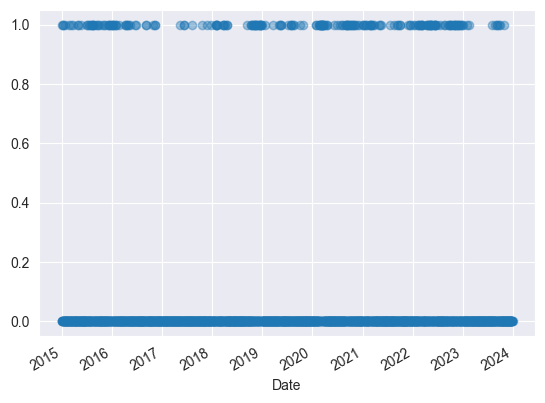

In [20]:
final_input_data['extreme_event'].plot(marker='o',linestyle='None',alpha=0.4)

In [21]:
#To predict a binary outcome (y = 0 or 1) using the past 10 days of historical data, 
# we can structure your data such that each row contains the historical data for the past 10 days, 
# and the target variable y is the value for the prediction (either 0 or 1).
# Use the values from the previous 10 days as features (X).
# Create an empty list to store all lag features
lag_features = []
window_size  = 10
target_column='extreme_event'
df = final_input_data.copy()
# Loop through each column and create the lag features
for i in range(1, window_size + 1):
    for col in df.columns:
        if col != target_column:  #Skip the target variable
            if i<10:
                lag_features.append(df[col].shift(i).rename(f'{col}_lag0{i}'))
            else:
                lag_features.append(df[col].shift(i).rename(f'{col}_lag{i}'))

# Concatenate all lag features as new columns to the original dataframe
final_input_data_lagged = pd.concat([df] + lag_features, axis=1)

# Drop rows with NaN values (the first 'window_size' rows will have NaNs)
final_input_data_lagged = final_input_data_lagged.dropna()
final_input_data_lagged= final_input_data_lagged.reindex(sorted(final_input_data_lagged.columns), axis=1)#sort the colnames
final_input_data_lagged

,Close,Close_lag01,Close_lag02,Close_lag03,Close_lag04,Close_lag05,Close_lag06,Close_lag07,Close_lag08,Close_lag09,Close_lag10,High,High_lag01,High_lag02,High_lag03,High_lag04,High_lag05,High_lag06,High_lag07,High_lag08,High_lag09,High_lag10,Low,Low_lag01,Low_lag02,Low_lag03,Low_lag04,Low_lag05,Low_lag06,Low_lag07,Low_lag08,Low_lag09,Low_lag10,Open,Open_lag01,Open_lag02,Open_lag03,Open_lag04,Open_lag05,Open_lag06,Open_lag07,Open_lag08,Open_lag09,Open_lag10,Volume,Volume_lag01,Volume_lag02,Volume_lag03,Volume_lag04,Volume_lag05,Volume_lag06,Volume_lag07,Volume_lag08,Volume_lag09,Volume_lag10,daily_return,daily_return_lag01,daily_return_lag02,daily_return_lag03,daily_return_lag04,daily_return_lag05,daily_return_lag06,daily_return_lag07,daily_return_lag08,daily_return_lag09,daily_return_lag10,extreme_event
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-16,26.497499,26.705000,27.450001,27.555000,27.312500,28.002501,27.972500,26.937500,26.565001,26.562500,27.332500,26.895000,27.514999,27.622499,28.200001,28.157499,28.312500,28.037500,27.049999,26.857500,27.162500,27.860001,26.299999,26.665001,27.125000,27.227501,27.200001,27.552500,27.174999,26.674999,26.157499,26.352501,26.837500,26.757500,27.500000,27.260000,27.857500,28.150000,28.167500,27.307501,26.799999,26.635000,27.072500,27.847500,314053200,240056000.0,195826400.0,268367600.0,198603200.0,214798000.0,237458000.0,160423600.0,263188400.0,257142000.0,212818400.0,-0.025111,0.007831,0.027898,0.003825,-0.008801,0.025263,-0.001071,-0.037000,-0.013829,-0.000094,0.028988,0
2015-01-20,27.180000,26.497499,26.705000,27.450001,27.555000,27.312500,28.002501,27.972500,26.937500,26.565001,26.562500,27.242500,26.895000,27.514999,27.622499,28.200001,28.157499,28.312500,28.037500,27.049999,26.857500,27.162500,26.625000,26.299999,26.665001,27.125000,27.227501,27.200001,27.552500,27.174999,26.674999,26.157499,26.352501,26.959999,26.757500,27.500000,27.260000,27.857500,28.150000,28.167500,27.307501,26.799999,26.635000,27.072500,199599600,314053200.0,240056000.0,195826400.0,268367600.0,198603200.0,214798000.0,237458000.0,160423600.0,263188400.0,257142000.0,-0.007576,-0.025111,0.007831,0.027898,0.003825,-0.008801,0.025263,-0.001071,-0.037000,-0.013829,-0.000094,0
2015-01-21,27.387501,27.180000,26.497499,26.705000,27.450001,27.555000,27.312500,28.002501,27.972500,26.937500,26.565001,27.764999,27.242500,26.895000,27.514999,27.622499,28.200001,28.157499,28.312500,28.037500,27.049999,26.857500,27.067499,26.625000,26.299999,26.665001,27.125000,27.227501,27.200001,27.552500,27.174999,26.674999,26.157499,27.237499,26.959999,26.757500,27.500000,27.260000,27.857500,28.150000,28.167500,27.307501,26.799999,26.635000,194303600,199599600.0,314053200.0,240056000.0,195826400.0,268367600.0,198603200.0,214798000.0,237458000.0,160423600.0,263188400.0,-0.025356,-0.007576,-0.025111,0.007831,0.027898,0.003825,-0.008801,0.025263,-0.001071,-0.037000,-0.013829,0
2015-01-22,28.100000,27.387501,27.180000,26.497499,26.705000,27.450001,27.555000,27.312500,28.002501,27.972500,26.937500,28.117500,27.764999,27.242500,26.895000,27.514999,27.622499,28.200001,28.157499,28.312500,28.037500,27.049999,27.430000,27.067499,26.625000,26.299999,26.665001,27.125000,27.227501,27.200001,27.552500,27.174999,26.674999,27.565001,27.237499,26.959999,26.757500,27.500000,27.260000,27.857500,28.150000,28.167500,27.307501,26.799999,215185600,194303600.0,199599600.0,314053200.0,240056000.0,195826400.0,268367600.0,198603200.0,214798000.0,237458000.0,160423600.0,-0.005134,-0.025356,-0.007576,-0.025111,0.007831,0.027898,0.003825,-0.008801,0.025263,-0.001071,-0.037000,0
2015-01-23,28.245001,28.100000,27.387501,27.180000,26.497499,26.705000,27.450001,27.555000,27.312500,28.002501,27.972500,28.437500,28.117500,27.764999,27.242500,26.895000,27.514999,27.622499,28.200001,28.157499,28.312500,28.037500,27.882500,27.430000,27.067499,26.625000,26.299999,26.665001,27.125000,27.227501,27.200001,27.552500,27.174999,28.075001,27.5650

In [22]:
# SPLIT 70-15-15
# For time series data, it's important to maintain the temporal order
# Step 1: Split the data into 70% for training and 30% for both validation and test
train_data, temp_data = train_test_split(final_input_data_lagged, test_size=0.3, shuffle=False)

# Step 2: Now, split the remaining 30% into 50% for validation and 50% for testing
val_data, test_data = train_test_split(temp_data, test_size=0.5, shuffle=False)

# Check the sizes of the splits
print(f"Training data size: {len(train_data)}")
print(f"Validation data size: {len(val_data)}")
print(f"Test data size: {len(test_data)}")

Training data size: 1577
Validation data size: 338
Test data size: 338


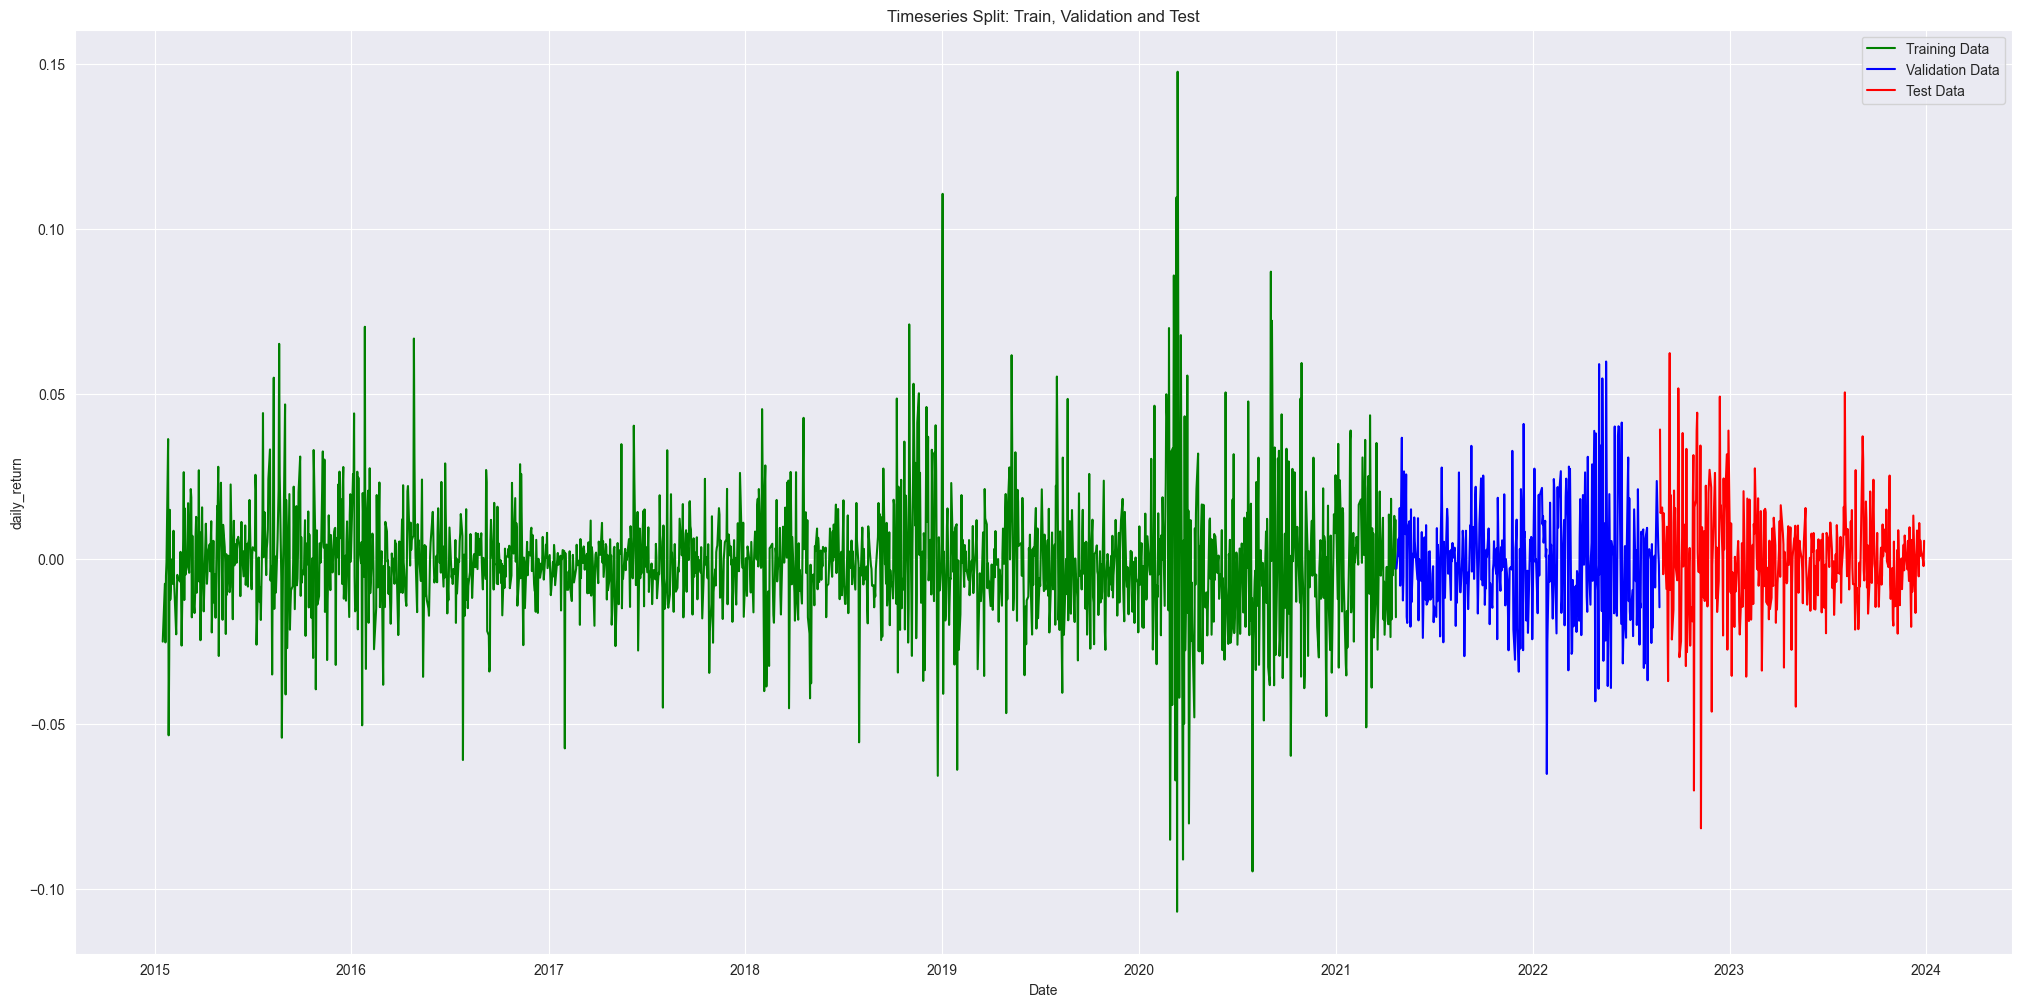

In [23]:
# Plot training data
plt.figure(figsize=(25, 12))  # Change (width, height) as needed
plt.plot(train_data.index, train_data['daily_return'], label='Training Data', color='green')
# Plot validation data
plt.plot(val_data.index, val_data['daily_return'], label='Validation Data', color='blue')
# Plot test data
plt.plot(test_data.index, test_data['daily_return'], label='Test Data', color='red')
# Add labels, title, and legend
plt.xlabel('Date')  # Adjust based on your index
plt.ylabel('daily_return')  # Adjust based on your data column
plt.title('Timeseries Split: Train, Validation and Test')
plt.legend()
# Show the plot
plt.show()#SEEMS OK

# RANDOM FOREST classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [25]:
X_train = train_data.drop(target_column, axis=1)
y_train = train_data[target_column]
#
X_val = val_data.drop(target_column, axis=1)
y_val = val_data[target_column]
#
X_test = test_data.drop(target_column, axis=1)
y_test = test_data[target_column]

In [26]:
X_train

,Close,Close_lag01,Close_lag02,Close_lag03,Close_lag04,Close_lag05,Close_lag06,Close_lag07,Close_lag08,Close_lag09,Close_lag10,High,High_lag01,High_lag02,High_lag03,High_lag04,High_lag05,High_lag06,High_lag07,High_lag08,High_lag09,High_lag10,Low,Low_lag01,Low_lag02,Low_lag03,Low_lag04,Low_lag05,Low_lag06,Low_lag07,Low_lag08,Low_lag09,Low_lag10,Open,Open_lag01,Open_lag02,Open_lag03,Open_lag04,Open_lag05,Open_lag06,Open_lag07,Open_lag08,Open_lag09,Open_lag10,Volume,Volume_lag01,Volume_lag02,Volume_lag03,Volume_lag04,Volume_lag05,Volume_lag06,Volume_lag07,Volume_lag08,Volume_lag09,Volume_lag10,daily_return,daily_return_lag01,daily_return_lag02,daily_return_lag03,daily_return_lag04,daily_return_lag05,daily_return_lag06,daily_return_lag07,daily_return_lag08,daily_return_lag09,daily_return_lag10
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-16,26.497499,26.705000,27.450001,27.555000,27.312500,28.002501,27.972500,26.937500,26.565001,26.562500,27.332500,26.895000,27.514999,27.622499,28.200001,28.157499,28.312500,28.037500,27.049999,26.857500,27.162500,27.860001,26.299999,26.665001,27.125000,27.227501,27.200001,27.552500,27.174999,26.674999,26.157499,26.352501,26.837500,26.757500,27.500000,27.260000,27.857500,28.150000,28.167500,27.307501,26.799999,26.635000,27.072500,27.847500,314053200,240056000.0,195826400.0,268367600.0,198603200.0,214798000.0,237458000.0,160423600.0,263188400.0,257142000.0,212818400.0,-0.025111,0.007831,0.027898,0.003825,-0.008801,0.025263,-0.001071,-0.037000,-0.013829,-0.000094,0.028988
2015-01-20,27.180000,26.497499,26.705000,27.450001,27.555000,27.312500,28.002501,27.972500,26.937500,26.565001,26.562500,27.242500,26.895000,27.514999,27.622499,28.200001,28.157499,28.312500,28.037500,27.049999,26.857500,27.162500,26.625000,26.299999,26.665001,27.125000,27.227501,27.200001,27.552500,27.174999,26.674999,26.157499,26.352501,26.959999,26.757500,27.500000,27.260000,27.857500,28.150000,28.167500,27.307501,26.799999,26.635000,27.072500,199599600,314053200.0,240056000.0,195826400.0,268367600.0,198603200.0,214798000.0,237458000.0,160423600.0,263188400.0,257142000.0,-0.007576,-0.025111,0.007831,0.027898,0.003825,-0.008801,0.025263,-0.001071,-0.037000,-0.013829,-0.000094
2015-01-21,27.387501,27.180000,26.497499,26.705000,27.450001,27.555000,27.312500,28.002501,27.972500,26.937500,26.565001,27.764999,27.242500,26.895000,27.514999,27.622499,28.200001,28.157499,28.312500,28.037500,27.049999,26.857500,27.067499,26.625000,26.299999,26.665001,27.125000,27.227501,27.200001,27.552500,27.174999,26.674999,26.157499,27.237499,26.959999,26.757500,27.500000,27.260000,27.857500,28.150000,28.167500,27.307501,26.799999,26.635000,194303600,199599600.0,314053200.0,240056000.0,195826400.0,268367600.0,198603200.0,214798000.0,237458000.0,160423600.0,263188400.0,-0.025356,-0.007576,-0.025111,0.007831,0.027898,0.003825,-0.008801,0.025263,-0.001071,-0.037000,-0.013829
2015-01-22,28.100000,27.387501,27.180000,26.497499,26.705000,27.450001,27.555000,27.312500,28.002501,27.972500,26.937500,28.117500,27.764999,27.242500,26.895000,27.514999,27.622499,28.200001,28.157499,28.312500,28.037500,27.049999,27.430000,27.067499,26.625000,26.299999,26.665001,27.125000,27.227501,27.200001,27.552500,27.174999,26.674999,27.565001,27.237499,26.959999,26.757500,27.500000,27.260000,27.857500,28.150000,28.167500,27.307501,26.799999,215185600,194303600.0,199599600.0,314053200.0,240056000.0,195826400.0,268367600.0,198603200.0,214798000.0,237458000.0,160423600.0,-0.005134,-0.025356,-0.007576,-0.025111,0.007831,0.027898,0.003825,-0.008801,0.025263,-0.001071,-0.037000
2015-01-23,28.245001,28.100000,27.387501,27.180000,26.497499,26.705000,27.450001,27.555000,27.312500,28.002501,27.972500,28.437500,28.117500,27.764999,27.242500,26.895000,27.514999,27.622499,28.200001,28.157499,28.312500,28.037500,27.882500,27.430000,27.067499,26.625000,26.299999,26.665001,27.125000,27.227501,27.200001,27.552500,27.174999,28.075001,27.565001,27.237499,26.959999,

In [27]:
# Step 1: Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=1111)# Initializes the classifier with 100 decision trees (the default), and random_state ensures reproducibility.

# Step 2: Train the classifier on the training data
clf.fit(X_train, y_train)

# Step 4: Predict on the test data
y_pred = clf.predict(X_test)

# Step 5: Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")# (True Positives, False Positives, True Negatives, False Negatives).
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")#detailed evaluation including precision, recall, F1-score, and support.
print(classification_report(y_test, y_pred))


Accuracy: 0.9970414201183432

Confusion Matrix:
[[309   0]
 [  1  28]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       309
           1       1.00      0.97      0.98        29

    accuracy                           1.00       338
   macro avg       1.00      0.98      0.99       338
weighted avg       1.00      1.00      1.00       338



In [28]:
# Step 6 Hyperparameter Tuning:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=1111), param_grid=param_grid, cv=5, n_jobs=-1)

# Fit grid search
grid_search.fit(X_train, y_train)

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [ ]:
#Step 7: Get best parameters and evaluate the model
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
y_pred_val = best_rf.predict(X_val)

# Evaluate the model on the validation set
print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_val))
print("Validation Classification Report:")
print(classification_report(y_val, y_pred_val))

In [ ]:
#Step 8: evaluate on the test set after fine-tuning (if needed)
y_pred_test = best_rf.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))

In [ ]:
# Create a DataFrame for better visualization
feature_importances = best_rf.feature_importances_

feature_names = X_train.columns
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(25, 25))
sns.barplot(x='Importance', y='Feature', data=feature_df, orient = 'h')
plt.title('Feature Importance')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming you have a classifier `model` and data `X` and `y`
scores = cross_val_score(best_rf, X_test, y_test, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())


In [ ]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the probability scores for the positive class
y_probs = best_rf.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve

# Get the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [ ]:
if 0:
    from sklearn.inspection import PartialDependenceDisplay
    import matplotlib.pyplot as plt
    
    # Set the desired figure size (width, height)
    plt.figure(figsize=(25, 50))  # Adjust width and height as needed
    
    # Generate the partial dependence plot for the first two features
    display = PartialDependenceDisplay.from_estimator(
        best_rf,  # Your trained RandomForest model
        X_train,  # Training data
        #features = [0,1,2,3,4,5],  # List of feature indices or names for which to plot PDP
        features = np.arange(0,len(X_train.columns.to_list())).tolist(),
        feature_names = X_train.columns,  # Feature names for labeling
        n_cols = 2
    
    )
    
    # Adjust title and layout if necessary
    plt.suptitle('Partial Dependence Plot', fontsize=16)  # Title with bigger font size
    plt.subplots_adjust(top=0.9)  # Adjust the title position to avoid overlap
    plt.show()


In [ ]:
from sklearn.model_selection import learning_curve
#A learning curve helps you understand how the model performance changes with varying amounts of training data.
# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(best_rf, X_train, y_train, cv=5, n_jobs=-1)

# Calculate the mean and standard deviation for train and test scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='green')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()